# 实验数据绘图

## excel数据源

主要逻辑：
+ 使用字典存储数据，{key(dataset): {'auc': [], 'ap': []}}
+ 按照划分比例，分别读取三个方法对应十四个数据集的auc和ap

In [11]:
import os.path as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
datasets = ["BUP","Celegans", "USAir", "SMG", "EML", "NSC", "YST", "Router", "Power", "KHN", "ADV", "LDG", "HPD", "GRQ", "ZWL"]
model_names = ['ata', 'lglp', 'seal', 'common', 'simrank', 'pagerank']
metrics = ['auc', 'ap', 'acc']

data = {dataset: {metric: {model_name: [] for model_name in model_names} for metric in metrics} for dataset in datasets}
percent = range(40, 90, 10)

for percentage in percent:
    base_dir = f'res/{percentage}/excel'
    
    for model_name in model_names:
        file_path = op.join(base_dir, f'res-{model_name}-{percentage}.xlsx')
        with pd.ExcelFile(file_path) as xlsx:
            for dataset in datasets:
                df = pd.read_excel(xlsx, sheet_name=dataset, engine='openpyxl')
                for metric in metrics:
                    data[dataset][metric][model_name].append(df.at[1, metric])


开始画图，先画一张

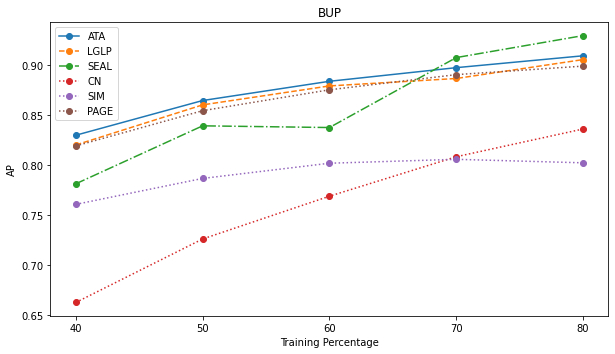

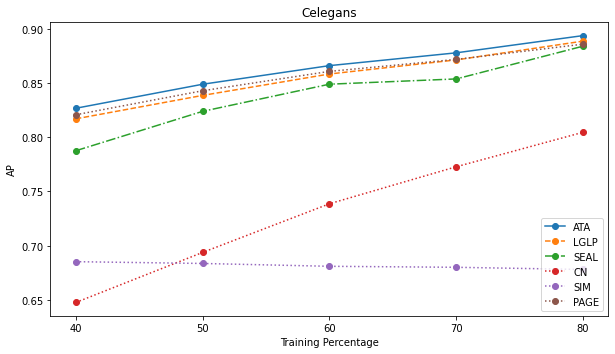

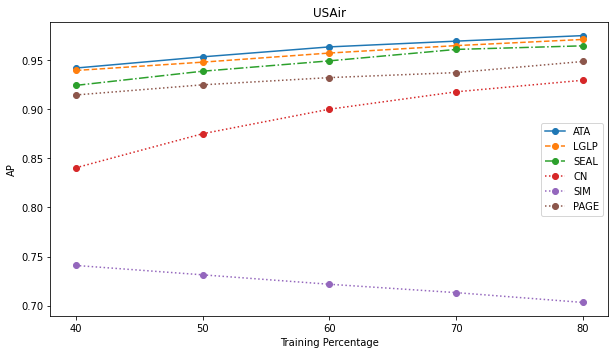

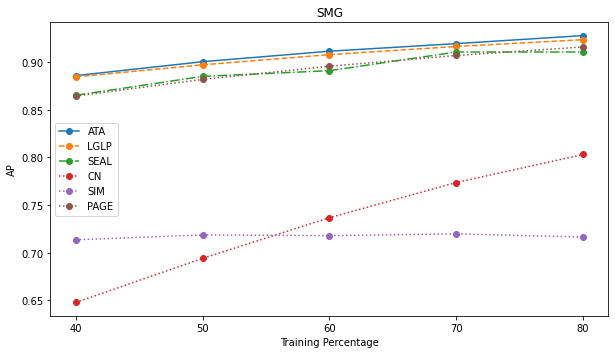

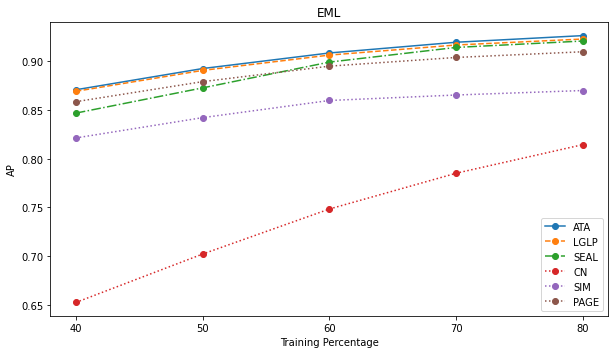

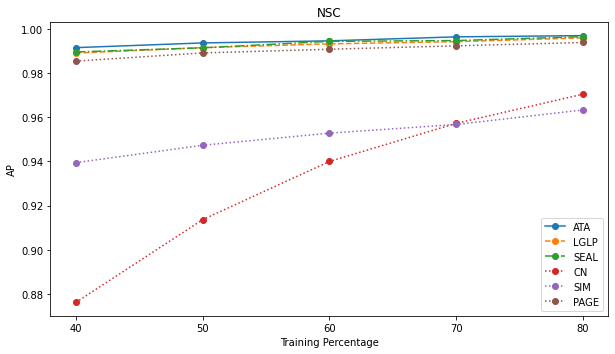

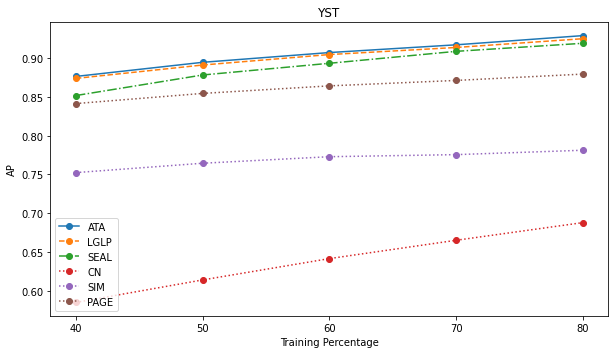

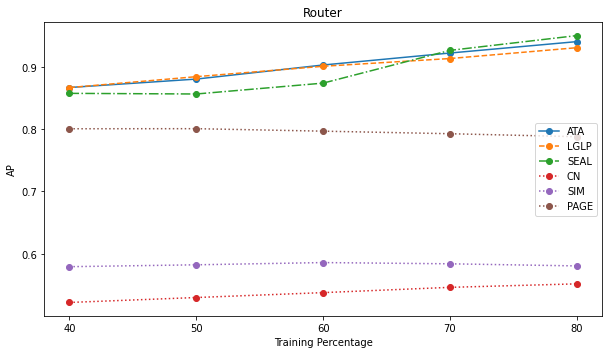

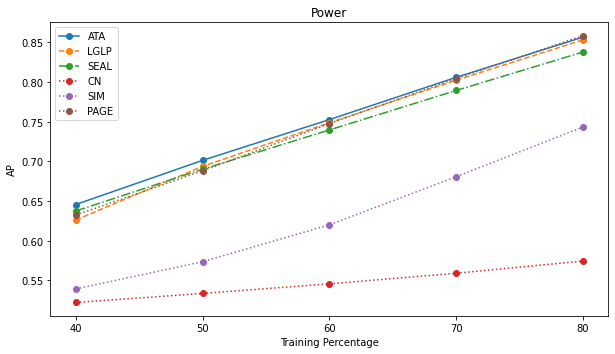

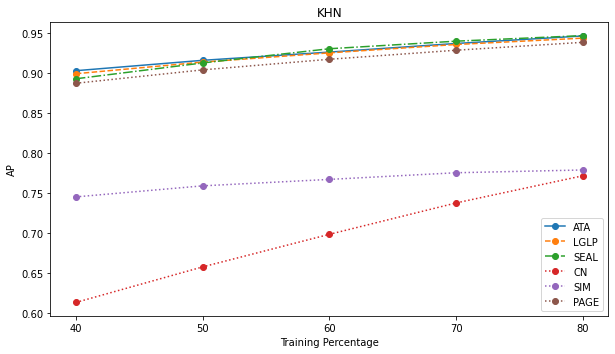

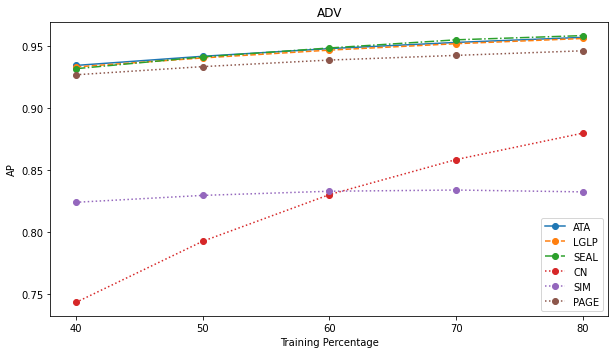

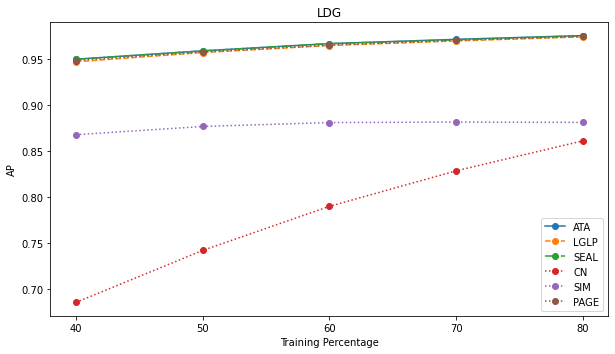

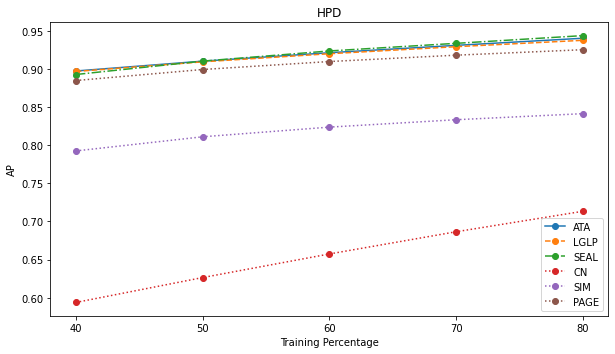

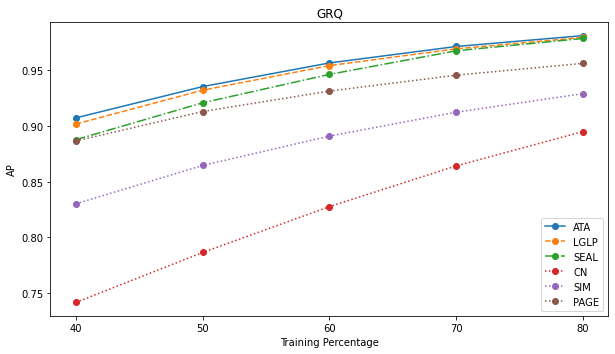

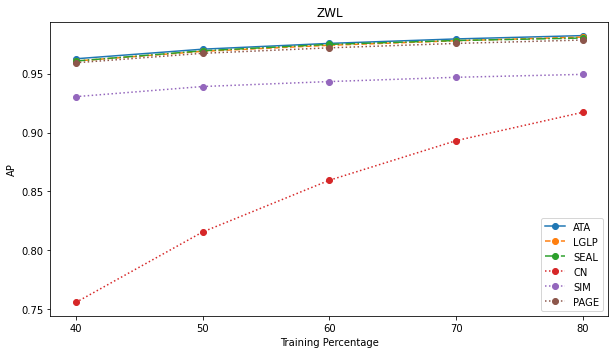

In [10]:

for dataset in datasets:
    auc = data[dataset]['ap']
    fig, ax = plt.subplots(figsize=(10, 5.4))
    ax.plot(percent, auc['ata'], label='ATA', marker='o', linestyle='-')
    ax.plot(percent, auc['lglp'], label='LGLP', marker='o', linestyle='--')
    ax.plot(percent, auc['seal'], label='SEAL', marker='o', linestyle='-.')
    ax.set_xlabel("Training Percentage")
    ax.set_xticks(percent)
    ax.set_ylabel("AP")
    ax.set_title(dataset)
    ax.legend()
    fig.savefig(f'img-ap/{dataset}.png', format='png')